In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df = pd.read_csv('/content/drive/MyDrive/df_all_years.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013044 entries, 0 to 2013043
Data columns (total 13 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Unnamed: 0               int64 
 1   Unnamed: 0.1             int64 
 2   abstract                 object
 3   snippet                  object
 4   lead_paragraph           object
 5   pub_date                 object
 6   document_type            object
 7   section_name             object
 8   type_of_material         object
 9   word_count               int64 
 10  headline.main            object
 11  headline.print_headline  object
 12  byline.original          object
dtypes: int64(3), object(10)
memory usage: 199.7+ MB


In [ ]:
df['document_type'].unique()

array(['article', 'multimedia', 'audio', 'audiocontainer'], dtype=object)

In [ ]:
df = df[df['document_type']=='article']

In [ ]:
df.drop(['Unnamed: 0', 'document_type'], axis=1, inplace=True)

In [ ]:
df.dropna(subset=['abstract', 'headline.main'], inplace=True)

## Liczba artykułów w roku


In [ ]:
df['pub_date'] = pd.to_datetime(df['pub_date'], errors='coerce')
df['pub_year'] = df['pub_date'].dt.year 
df['pub_month'] = df['pub_date'].dt.month 
df['pub_day'] = df['pub_date'].dt.day
df.sample()

,Unnamed: 0.1,abstract,snippet,lead_paragraph,pub_date,section_name,type_of_material,word_count,headline.main,headline.print_headline,byline.original,pub_year,pub_month,pub_day
98665,6703,To help free resources for tiniest and most fr...,To help free resources for tiniest and most fr...,"In developing countries, the number of underwe...",2001-11-20 05:00:00+00:00,Health,News,233,'Kangaroo' Care for Underweight Infants,VITAL SIGNS: AT RISK; 'Kangaroo' Care for Unde...,By John O'Neil,2001,11,20


In [ ]:
per_year = df.groupby('pub_year')['pub_date'].aggregate(np.size)
per_year

pub_year
2001    110970
2002    109392
2003    107146
2004    102989
2005    101322
2006    153721
2007     96974
2008    113844
2009    142591
2010    106345
2011     92647
2012     92374
2013     79845
2014     77667
2015     69609
2016     61934
2017     54919
2018     52983
2019     50252
2020     50957
2021     47191
Name: pub_date, dtype: int64

Text(0, 0.5, 'Liczba artykułów')

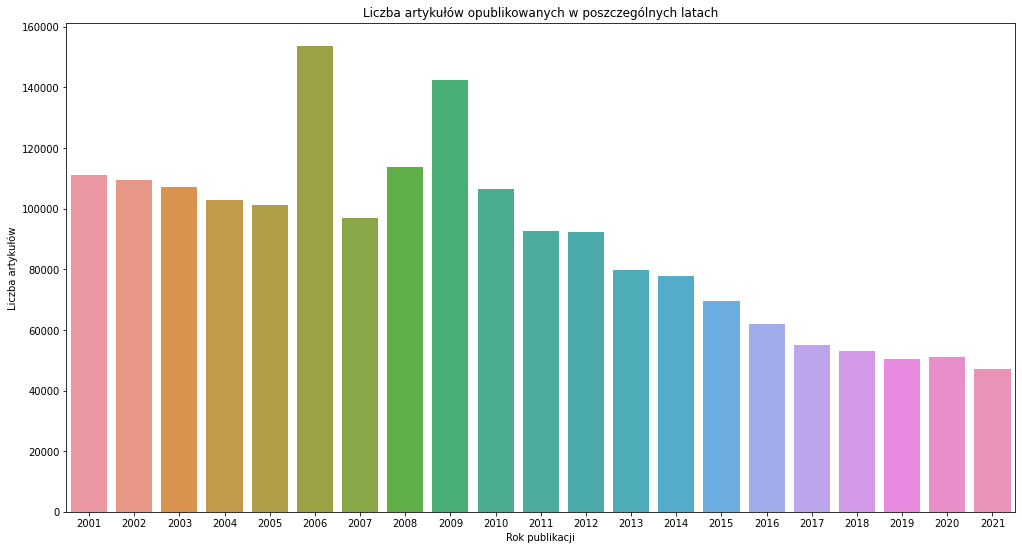

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Liczba artykułów opublikowanych w poszczególnych latach')
ax = sns.countplot(x='pub_year',data=df)
plt.xlabel('Rok publikacji')
plt.ylabel('Liczba artykułów')

### Liczba artykułów w roku z podziałem na miesiące

Text(0, 0.5, 'Liczba artykułów')

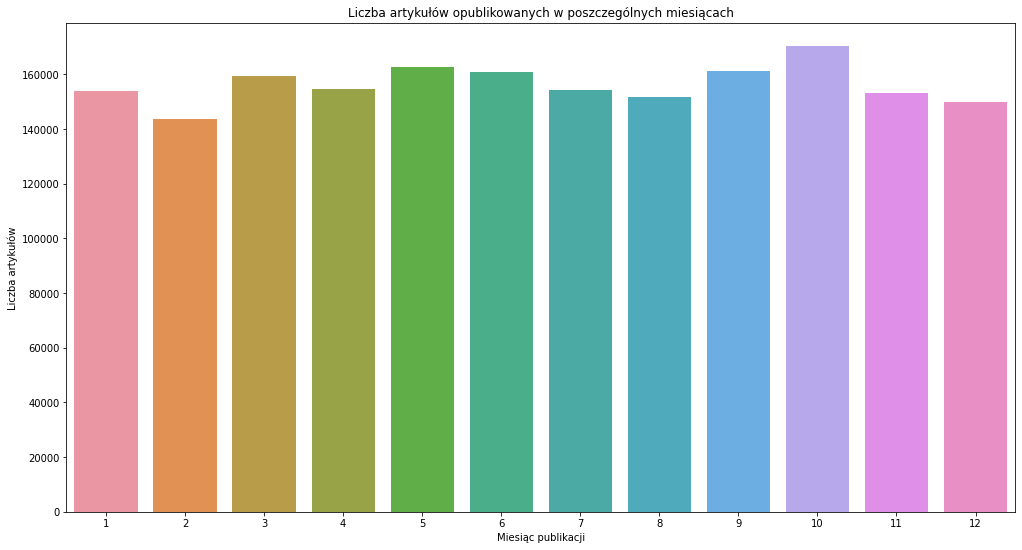

In [ ]:
plt.figure(figsize=(17,9))
plt.title('Liczba artykułów opublikowanych w poszczególnych miesiącach')
ax = sns.countplot(x='pub_month', data=df)
plt.xlabel('Miesiąc publikacji')
plt.ylabel('Liczba artykułów')

# Statystyki word_count

In [ ]:
df.groupby('pub_year')['word_count'].agg(['mean', 'median', 'std','min','max'])

,mean,median,std,min,max
pub_year,,,,,
2001,594.025025,433.0,667.549679,0,35508
2002,600.624415,442.0,858.257343,0,102439
2003,588.919764,446.5,685.980992,0,25443
2004,657.478245,497.0,831.227744,0,68792
2005,656.668680,521.0,842.381199,0,76570
2006,643.459540,526.0,740.630326,0,71371
2007,656.507352,536.0,664.356419,0,24830
2008,624.998252,485.0,644.106478,0,20092
2009,575.153965,421.0,668.217121,0,66218


Text(0.5, 1.0, 'Mediana liczby słów w artykułach w poszczególnych latach')

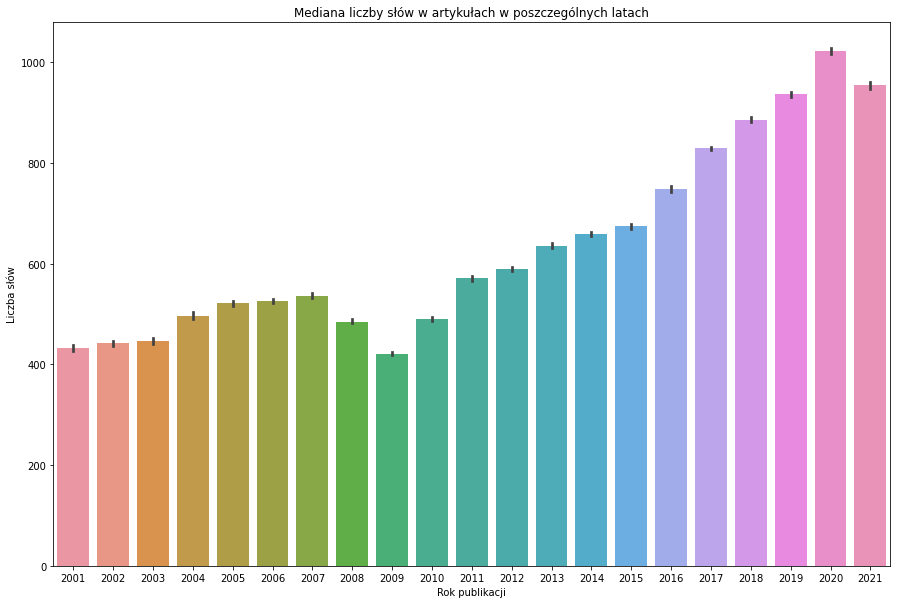

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='pub_year', y='word_count', data=df, estimator=np.median)
plt.xlabel('Rok publikacji')
plt.ylabel('Liczba słów')
plt.title('Mediana liczby słów w artykułach w poszczególnych latach')

# Liczba artykułów w zależności od sekcji

In [ ]:
df['section_name'].unique()

array(['New York', 'Business Day', 'Archives', 'Sports', 'World', 'U.S.',
       'Arts', 'Opinion', 'Books', 'Technology', 'Style', 'Theater',
       'Health', 'Science', 'Education', 'Food', 'Job Market', 'Movies',
       'Travel', 'Home & Garden', 'Automobiles', 'Real Estate',
       'Magazine', 'Week in Review', 'Fashion & Style', 'T Magazine',
       'Obituaries', 'The Learning Network', 'membercenter', 'Climate',
       'Your Money', 'Corrections', 'Homepage', 'Giving',
       'readersopinions', 'Crosswords & Games',
       'Great Homes & Destinations', 'Multimedia/Photos', nan,
       'Washington', 'College', 'none', 'Blogs', 'Times Topics', 'Well',
       'UrbanEye', "Critic's Choice", 'xword', 'Sunday Review',
       'Public Editor', 'Booming', 'International Home', 'The Upshot',
       'Times Insider', 'NYT Now', 'Universal', 'Topics', 'Today’s Paper',
       'Podcasts', 'Briefing', 'Watching', 'Admin', 'Smarter Living',
       'Reader Center', 'Lens', 'Video', 'Neediest Cases

In [ ]:
gr_section = df.groupby(['section_name'])[['pub_date']].count()
gr_section.sort_values(by='pub_date', ascending=False)[0:10] #do 10; pozostałe <40 tys. artykułów

,pub_date
section_name,
Business Day,242105
New York,213691
Opinion,175179
U.S.,167791
Sports,158768
World,152349
Arts,143560
Archives,76807
Books,48166


In [ ]:
sections_to_keep = ['Business Day', 'New York', 'Opinion', 'U.S.', 'World', 'Sports', 'Arts', 'Archives', 'Books', 'Blogs']
df['section_new'] = df['section_name'].map(lambda x: x if x in sections_to_keep else 'Others')

Text(0.5, 1.0, 'Liczba artykułów w poszczególnych sekcjach')

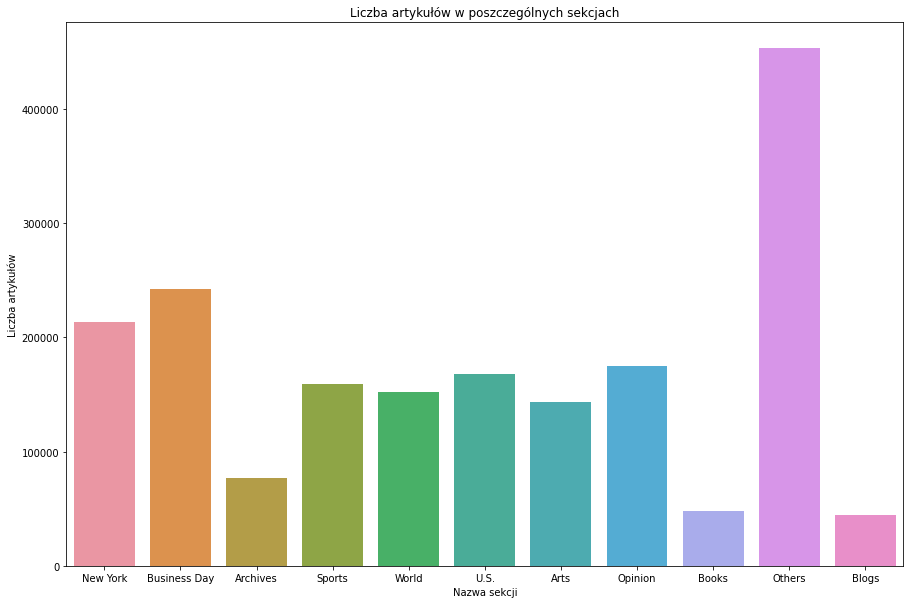

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='section_new', data=df)
plt.xlabel('Nazwa sekcji')
plt.ylabel('Liczba artykułów')
plt.title('Liczba artykułów w poszczególnych sekcjach')

# Liczba artykułów w zależności od type_of_material


In [ ]:
gr_material = df.groupby('type_of_material')[['pub_date']].count()
gr_material.sort_values(by='pub_date', ascending=False)[0:9] #do 9, bo 9 pierwszych ma >20 tys.; pozostałe mniej

,pub_date
type_of_material,
News,1271599
Review,98953
Letter,82605
Paid Death Notice,69440
Op-Ed,50676
Correction,36495
Web Log,36039
Editorial,26266
Brief,21526


In [ ]:
types_to_keep = ['News', 'Review', 'Letter', 'Paid Death Notice', 'Op-Ed', 'Correction', 'Web Log', 'Editorial', 'Brief']
df['type_new'] = df['type_of_material'].map(lambda x: x if x in types_to_keep else 'Others')

Text(0.5, 1.0, 'Liczba artykułów w zależności od typu')

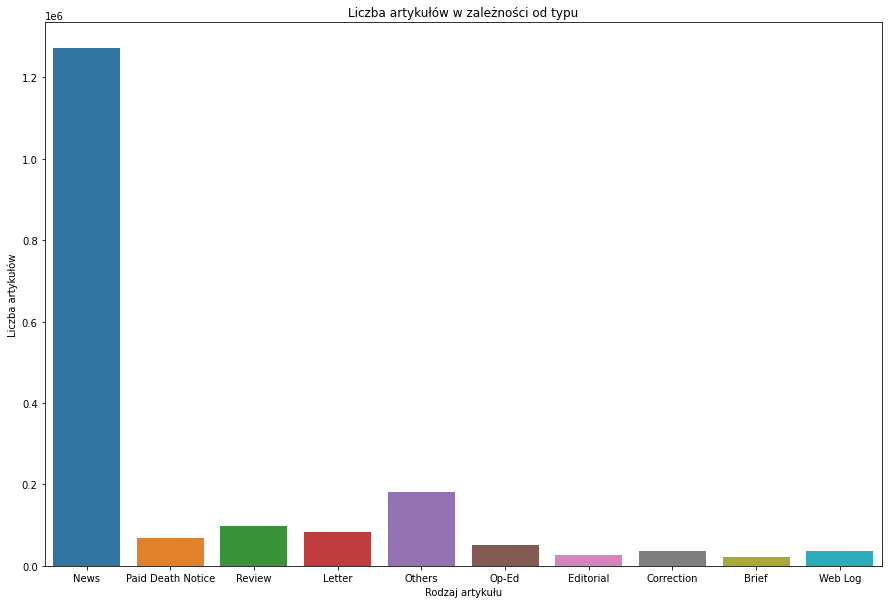

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='type_new', data=df)
plt.xlabel('Rodzaj artykułu')
plt.ylabel('Liczba artykułów')
plt.title('Liczba artykułów w zależności od typu')

# WordCloud - tytuły

In [ ]:
with open('/content/drive/MyDrive/stop_words.txt') as f:
    my_stop_words = f.read().splitlines()

In [ ]:
wordcloud = WordCloud(stopwords=my_stop_words, background_color="white", prefer_horizontal=1, relative_scaling=0.5).generate(' '.join(map(str, df['headline.main'])))

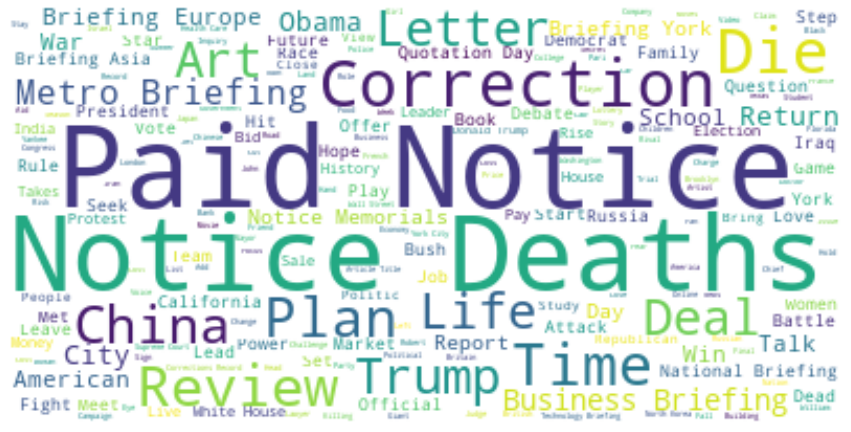

In [ ]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Rok publikacji 2001


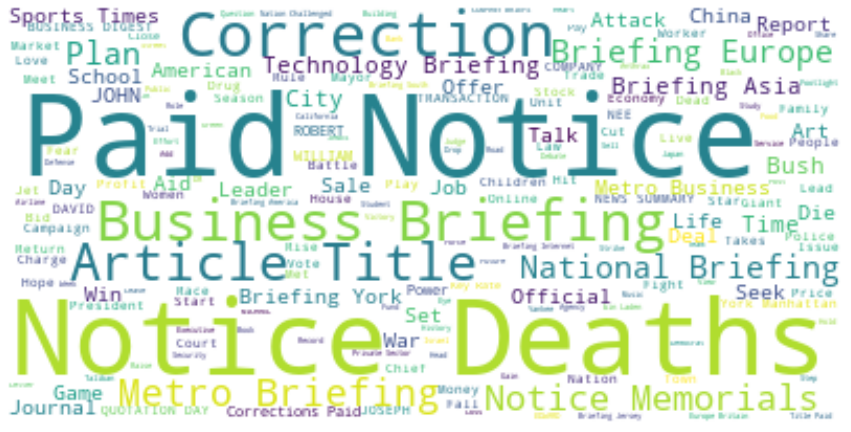

Rok publikacji 2011


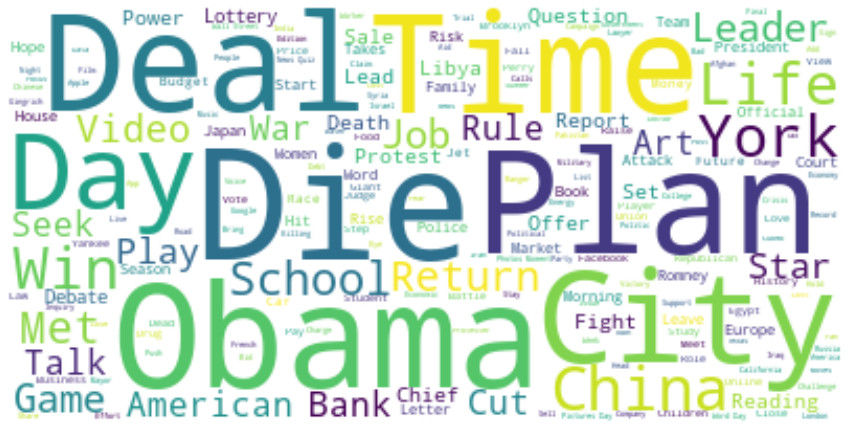

Rok publikacji 2021


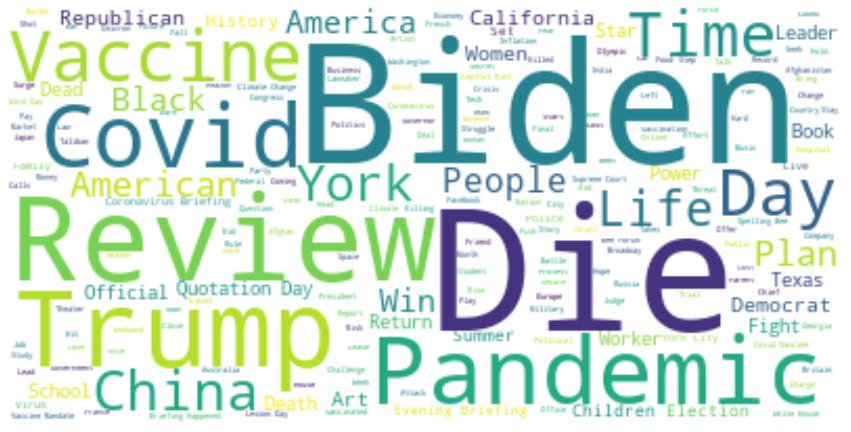

In [ ]:
l = [2001, 2011, 2021]
for i in range(len(l)):
    dummy_df = df[df['pub_year'] == l[i]]
    #Generate a word cloud image
    print('Rok publikacji',l[i])
    wordcloud = WordCloud(stopwords=my_stop_words, background_color="white",prefer_horizontal=1,relative_scaling=0.5).generate(' '.join(map(str, dummy_df['headline.main'])))
    #Display the generated image   
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# WordCloud - abstrakty

Rok publikacji 2001


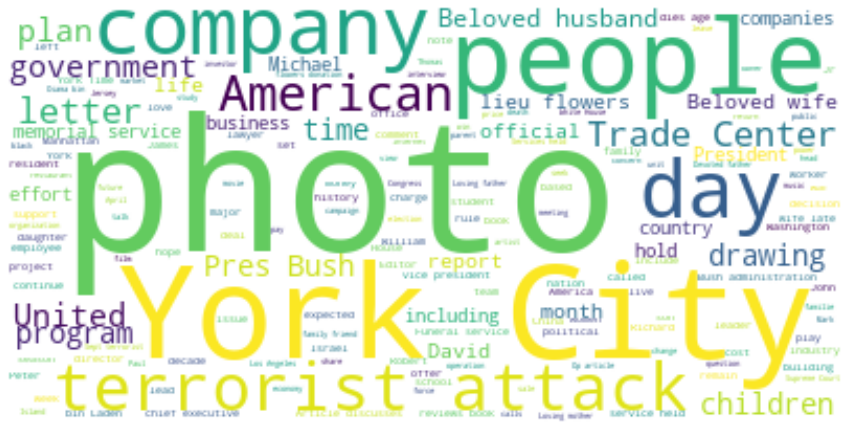

Rok publikacji 2011


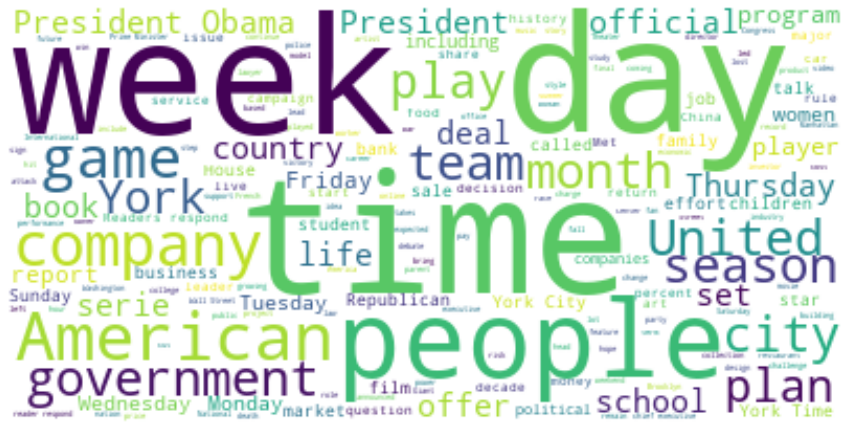

Rok publikacji 2021


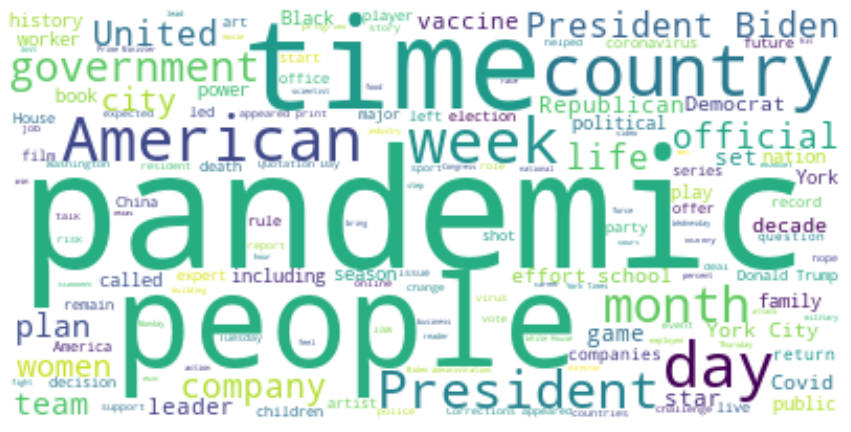

In [ ]:
l = [2001, 2011, 2021]
for i in range(len(l)):
    dummy_df = df[df['pub_year'] == l[i]]
    #Generate a word cloud image
    print('Rok publikacji',l[i])
    wordcloud = WordCloud(stopwords=my_stop_words, background_color="white",prefer_horizontal=1,relative_scaling=0.5).generate(' '.join(map(str, dummy_df['abstract'])))
    #Display the generated image   
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()